In [1]:
import sys
sys.path.append('/home/greg/GitHub/')
import pyEDIutils.changes as edi
import pandas as pd
import numpy as np

In [2]:
# Request changes from Dec 2021 to ...
new = edi.request_changes('2021-06-02', '2021-11-09')

Requesting PASTA changes for knb-lter-jrn from 2021-06-02 to 2021-11-09
https://pasta.lternet.edu/package/changes/eml?fromDate=2021-06-02&toDate=2021-11-09&scope=knb-lter-jrn
0 duplicate records were removed.


In [3]:
old = edi.archived_changes()

Reading archived PASTA request knb-lter-jrn_20150417-20181231.xml
Reading archived PASTA request knb-lter-jrn_20190101-20191231.xml
Reading archived PASTA request knb-lter-jrn_20200101-20200601.xml
Reading archived PASTA request knb-lter-jrn_20200602-20201201.xml
Reading archived PASTA request knb-lter-jrn_20201202-20210601.xml
9 duplicate records were removed.


In [4]:
max(old.date)

'2021-05-05T15:46:06.9'

In [5]:
df = pd.concat([old, new])
df

,date,pkgid,action
0,2015-04-17T14:42:05.936,2100011003,createDataPackage
1,2015-04-17T15:43:26.172,210120002,createDataPackage
2,2015-04-17T15:43:26.771,2100392001,createDataPackage
3,2015-04-17T15:43:41.508,2100169002,createDataPackage
4,2015-04-17T15:43:45.55,2100010001,createDataPackage
...,...,...,...
813,2021-10-13T14:43:34.426,210437015,updateDataPackage
814,2021-10-13T14:58:41.276,210437109,updateDataPackage
815,2021-10-20T13:51:15.187,210380001,updateDataPackage
816,2021-10-25T08:51:11.17,200022001,createDataPackage


In [10]:
df = edi.get_counts(df)

In [12]:
daily = edi.counts_to_daily(df, startdt='2020-11-01')
daily

,n_update,n_create,n_tot
date,,,
2020-11-03,98,0,0
2020-11-04,4,0,0
2020-11-05,0,0,0
2020-11-06,0,0,0
2020-11-07,0,0,0
...,...,...,...
2021-10-31,0,0,0
2021-11-01,0,0,0
2021-11-02,0,0,0


## Plot activity since last report (2020-11-01)


In [13]:
import matplotlib
import matplotlib.pyplot as plt
# Figure config
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

# Get a datestamp for saving figures
import datetime
now = datetime.datetime.now().strftime("%Y%m%d")

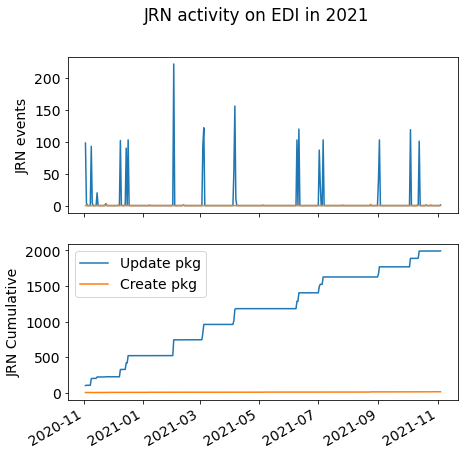

In [22]:
# All time plot:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7, 7), sharex=True)

ax[0].plot(daily.index, daily.n_update, label='Update pkg')
ax[0].plot(daily.index, daily.n_create, label='Create pkg')
ax[0].set_ylabel('JRN events')

ax[1].plot(daily.index, daily.n_update.cumsum(), label='Update pkg')
ax[1].plot(daily.index, daily.n_create.cumsum(), label='Create pkg')
#ax[1].plot(daily.index, daily.n_tot.cumsum(), label='Total')

plt.ylabel('JRN Cumulative')
fig.autofmt_xdate()
plt.suptitle('JRN activity on EDI in 2021')
plt.legend()

import os
fig.savefig(os.path.expanduser("~/GD_gmaurer@nmsu/IM/figures/JRN_EDI_2021_ann_rpt_{0}.png".format(now)),
            dpi=150, bbox_inches='tight',facecolor='w')

### Total number of packages

In [23]:
daily.n_create.sum()

11

In [24]:
daily.n_update.sum()

1994

## Plot 2021 activity excluding Met

In [25]:
nomet = np.logical_and(df.studyid!='437', df.studyid!='548')
daily_nomet = edi.counts_to_daily(df.loc[nomet], startdt='2020-11-01')

daily_nomet.head()

,n_update,n_create,n_tot
date,,,
2020-11-23,0,1,1
2020-11-24,3,0,0
2020-11-25,0,1,1
2020-11-26,0,0,0
2020-11-27,0,0,0


### Total number of packages

In [26]:
daily_nomet.n_create.sum()

11

In [27]:
daily_nomet.n_update.sum()

9

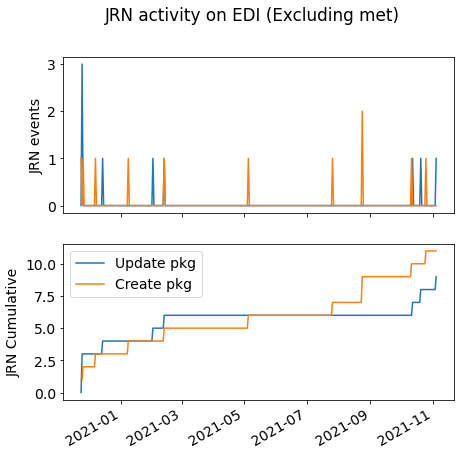

In [28]:
# Recent plot:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7, 7), sharex=True)

ax[0].plot(daily_nomet.index, daily_nomet.n_update, label='Update pkg')
ax[0].plot(daily_nomet.index, daily_nomet.n_create, label='Create pkg')
ax[0].set_ylabel('JRN events')

ax[1].plot(daily_nomet.index, daily_nomet.n_update.cumsum(), label='Update pkg')
ax[1].plot(daily_nomet.index, daily_nomet.n_create.cumsum(), label='Create pkg')
#ax[1].plot(daily_nomet.index, daily_nomet.n_tot.cumsum(), label='$\Delta$ Total')
#ax[1].axhline(y=63, xmin=0, xmax=1, ls=':', lw=1.5, color='k',
#             label='Proposal goal')

plt.ylabel('JRN Cumulative')
fig.autofmt_xdate()
plt.suptitle('JRN activity on EDI (Excluding met)')
plt.legend()

#fig.savefig(os.path.expanduser(
#    "/Users/gmaurer/GD_gmaurer.jrn.lter/IM/figures/JRN_EDI_2021_ann_rpt_NoMet_{0}.png".format(now)),
#            dpi=150, bbox_inches='tight',facecolor='w')

## Summary since last Annual Report

In [29]:
# Unique packages updated (excluding met)
rEDI = df.loc[df.index > '2019-12-31',]
rEDI_nomet = rEDI.loc[np.logical_and(rEDI.studyid!='437', rEDI.studyid!='548'),:]
print(len(rEDI.loc[rEDI.action=='updateDataPackage',]))
uniqueUp = rEDI.loc[rEDI.action=='updateDataPackage',].pkgid.unique()
uniqueUp_nomet = rEDI_nomet.loc[rEDI_nomet.action=='updateDataPackage',].pkgid.unique()
#rEDI.loc[rEDI.action=='updateDataPackage',].pkgid.unique()
print(uniqueUp)
print(uniqueUp_nomet)
print(len(uniqueUp))
len(uniqueUp_nomet)

TypeError: Invalid comparison between dtype=int64 and str

In [17]:
pkgtbl = pd.DataFrame({'Total':[daily.n_create.sum(), daily.n_update.sum(),len(uniqueUp)],
                       'Non-Met':[daily_nomet.n_create.sum(), daily_nomet.n_update.sum(),len(uniqueUp_nomet)]})
pkgtbl.index = ['New packages created', 'Package updates', 'Unique package updates']

with open('tables_out/2020_annrpt_edi.md', 'w') as f:
    f.write(pkgtbl.to_markdown(tablefmt="grid"))

pkgtbl

ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

In [18]:
uniqueUp2 = ['https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-jrn&identifier=' + str(s)
             for s in uniqueUp]
with open('2020AR_unique_EDI_updates.txt', 'w') as f:
    for item in uniqueUp2:
        f.write("%s\n" % item)
        
uniqueUp2


['https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-jrn&identifier=210308001',
 'https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-jrn&identifier=210308002',
 'https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-jrn&identifier=210308003',
 'https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-jrn&identifier=210308005',
 'https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-jrn&identifier=210126003',
 'https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-jrn&identifier=210437031',
 'https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-jrn&identifier=210437016',
 'https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-jrn&identifier=210437046',
 'https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-jrn&identifier=210437061',
 'https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-jrn&identifier=210437001',
 'https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-jrn&identifier=210437091',